# Core 22 8.0.0 2023 benchmarking

In [1]:
import glob
import os
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
from fah_log_parser import ParseError, parse, science_log
from fah_log_parser.util.pandas import parse_project_logs

/home/hmacdope/anaconda3/envs/openmm-core-v2/lib/python3.9/site-packages/pydantic-2.0b2-py3.9.egg/pydantic/_internal/_config.py:237: UserWarning: Valid config keys have changed in V2:
* 'allow_mutation' has been removed
  warnings.warn(message, UserWarning)


In [2]:
if os.path.exists("checkpoint_17113"):
    data_113 = pd.read_feather("checkpoint_17113")
    data_113.set_index(["run", "clone", "gen"])
else:
    data_113 = parse_project_logs("../PROJ17113/", sample=3000)
    data_113.reset_index().to_feather("checkpoint_17113")
data_113.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2804 entries, 0 to 2803
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   run                    2804 non-null   int64  
 1   clone                  2804 non-null   int64  
 2   gen                    2804 non-null   int64  
 3   os                     2804 non-null   object 
 4   platform_name          2804 non-null   object 
 5   platform_vendor        2804 non-null   object 
 6   platform_version       2804 non-null   object 
 7   device_name            2804 non-null   object 
 8   device_vendor          2804 non-null   object 
 9   device_version         2804 non-null   object 
 10  device_driver_version  2804 non-null   object 
 11  cuda_enabled           2804 non-null   bool   
 12  perf_ns_per_day        2803 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 265.7+ KB


In [3]:
data_113["platform_name"].value_counts()

platform_name
NVIDIA CUDA                            2785
AMD Accelerated Parallel Processing      19
Name: count, dtype: int64

In [4]:
data_113["cuda_enabled"].value_counts()

cuda_enabled
True     2785
False      19
Name: count, dtype: int64

In [5]:
data_113["device_name"].value_counts()

device_name
NVIDIA GeForce GTX 1080 Ti    1505
NVIDIA GeForce GTX 970         458
NVIDIA GeForce RTX 3060        351
NVIDIA GeForce GTX 1070        214
NVIDIA GeForce RTX 3080 Ti     156
NVIDIA GeForce RTX 4070 Ti      83
NVIDIA RTX A4500                12
gfx1100                         10
Baffin                           6
NVIDIA GeForce RTX 2060          3
NVIDIA GeForce GTX 980           3
gfx1030                          2
gfx906                           1
Name: count, dtype: int64

In [6]:
data_113

,run,clone,gen,os,platform_name,platform_vendor,platform_version,device_name,device_vendor,device_version,device_driver_version,cuda_enabled,perf_ns_per_day
0,16,165,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 11.7.101,NVIDIA GeForce RTX 3060,NVIDIA Corporation,OpenCL 3.0 CUDA,516.94,True,113.0810
1,14,14,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,104.7200
2,3,9,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.147,NVIDIA GeForce GTX 970,NVIDIA Corporation,OpenCL 3.0 CUDA,525.89.02,True,256.8220
3,14,3,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,104.7200
4,2,122,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.1.98,NVIDIA GeForce RTX 4070 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,531.41,True,569.5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799,11,148,0,win32 10,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.94,NVIDIA GeForce RTX 3080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,527.56,True,27.9936
2800,8,90,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,60.3333
2801,4,72,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.133,NVIDIA GeForce GTX 1080 Ti,NVIDIA Corporation,OpenCL 3.0 CUDA,525.78.01,True,76.9729
2802,13,139,0,linux 5.15.0-1034-azure,NVIDIA CUDA,NVIDIA Corporation,OpenCL 3.0 CUDA 12.0.151,NVIDIA GeForce GTX 1070,NVIDIA Corporation,OpenCL 3.0 CUDA,525.105.17,True,36.6086


In [7]:
# drop non CUDA for now


In [8]:
gpu_table_113 = data_113.groupby('device_name').mean("perf_ns_per_day")


In [9]:
if os.path.exists("checkpoint_17110"):
    data_110 = pd.read_feather("checkpoint_17110")
    data_110.set_index(["run", "clone", "gen"])
else:
    data_110 = parse_project_logs("../PROJ17110/", sample=3000)
    data_110.reset_index().to_feather("checkpoint_17110")
data_110.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   run                    2590 non-null   int64  
 1   clone                  2590 non-null   int64  
 2   gen                    2590 non-null   int64  
 3   os                     2590 non-null   object 
 4   platform_name          2590 non-null   object 
 5   platform_vendor        2590 non-null   object 
 6   platform_version       2590 non-null   object 
 7   device_name            2590 non-null   object 
 8   device_vendor          2590 non-null   object 
 9   device_version         2590 non-null   object 
 10  device_driver_version  2590 non-null   object 
 11  cuda_enabled           2590 non-null   bool   
 12  perf_ns_per_day        2588 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 245.5+ KB


In [10]:
data_110["platform_name"].value_counts()

platform_name
NVIDIA CUDA                            2450
AMD Accelerated Parallel Processing      84
Intel(R) OpenCL HD Graphics              52
Intel(R) OpenCL                           4
Name: count, dtype: int64

In [11]:
data_110["device_name"].value_counts()

device_name
NVIDIA GeForce RTX 2060       289
NVIDIA GeForce GTX 750 Ti     255
NVIDIA GeForce GTX 1080 Ti    224
NVIDIA GeForce RTX 3070       207
NVIDIA GeForce GTX 1070 Ti    145
                             ... 
GeForce RTX 2070 SUPER          1
GeForce GTX 980 Ti              1
Spectre                         1
NVIDIA GeForce GTX 750          1
Hawaii                          1
Name: count, Length: 86, dtype: int64

In [12]:
data_110["cuda_enabled"].value_counts()

cuda_enabled
True     2219
False     371
Name: count, dtype: int64

In [13]:
gpu_table_110 = data_110.groupby('device_name').mean("perf_ns_per_day")


In [14]:
gpu_table_110 = gpu_table_110.rename(columns={"perf_ns_per_day":"perf_P17110_7.7.0", "cuda_enabled":"cuda_enabled_110"})

In [15]:
gpu_table_113 = gpu_table_113.rename(columns={"perf_ns_per_day":"perf_P17113_8.0.0", "cuda_enabled":"cuda_enabled_113"})

In [16]:
merged_df = gpu_table_113.merge(gpu_table_110, left_index=True, right_index=True)


In [17]:
merged_df

,run_x,clone_x,gen_x,cuda_enabled_113,perf_P17113_8.0.0,run_y,clone_y,gen_y,cuda_enabled_110,perf_P17110_7.7.0
device_name,,,,,,,,,,
NVIDIA GeForce GTX 1070,7.453271,184.443925,0.0,1.0,132.220796,9.058824,51.617647,0.0,1.000000,110.086020
NVIDIA GeForce GTX 1080 Ti,7.675748,62.936877,0.0,1.0,189.097395,8.450893,93.205357,0.0,0.973214,130.562762
NVIDIA GeForce GTX 970,7.026201,71.606987,0.0,1.0,106.839400,5.805556,155.750000,0.0,1.000000,97.320968
NVIDIA GeForce GTX 980,4.000000,167.333333,0.0,1.0,92.538233,8.500000,15.928571,0.0,1.000000,86.401689
NVIDIA GeForce RTX 2060,16.000000,144.000000,0.0,1.0,261.135000,8.252595,98.709343,0.0,1.000000,164.235245
NVIDIA GeForce RTX 3080 Ti,8.128205,136.865385,0.0,1.0,226.972147,7.266667,74.266667,0.0,1.000000,163.212233
gfx1030,14.000000,120.000000,0.0,0.0,126.872000,9.000000,29.296296,0.0,0.000000,96.367611
gfx906,0.000000,119.000000,0.0,0.0,96.847700,10.533333,51.733333,0.0,0.000000,67.658921


In [18]:
merged_df.sort_index()

,run_x,clone_x,gen_x,cuda_enabled_113,perf_P17113_8.0.0,run_y,clone_y,gen_y,cuda_enabled_110,perf_P17110_7.7.0
device_name,,,,,,,,,,
NVIDIA GeForce GTX 1070,7.453271,184.443925,0.0,1.0,132.220796,9.058824,51.617647,0.0,1.000000,110.086020
NVIDIA GeForce GTX 1080 Ti,7.675748,62.936877,0.0,1.0,189.097395,8.450893,93.205357,0.0,0.973214,130.562762
NVIDIA GeForce GTX 970,7.026201,71.606987,0.0,1.0,106.839400,5.805556,155.750000,0.0,1.000000,97.320968
NVIDIA GeForce GTX 980,4.000000,167.333333,0.0,1.0,92.538233,8.500000,15.928571,0.0,1.000000,86.401689
NVIDIA GeForce RTX 2060,16.000000,144.000000,0.0,1.0,261.135000,8.252595,98.709343,0.0,1.000000,164.235245
NVIDIA GeForce RTX 3080 Ti,8.128205,136.865385,0.0,1.0,226.972147,7.266667,74.266667,0.0,1.000000,163.212233
gfx1030,14.000000,120.000000,0.0,0.0,126.872000,9.000000,29.296296,0.0,0.000000,96.367611
gfx906,0.000000,119.000000,0.0,0.0,96.847700,10.533333,51.733333,0.0,0.000000,67.658921


In [19]:
clean = merged_df.drop(columns=["cuda_enabled_113", "cuda_enabled_110"])

In [20]:
clean[["perf_P17113_8.0.0", "perf_P17110_7.7.0"]]

,perf_P17113_8.0.0,perf_P17110_7.7.0
device_name,,
NVIDIA GeForce GTX 1070,132.220796,110.086020
NVIDIA GeForce GTX 1080 Ti,189.097395,130.562762
NVIDIA GeForce GTX 970,106.839400,97.320968
NVIDIA GeForce GTX 980,92.538233,86.401689
NVIDIA GeForce RTX 2060,261.135000,164.235245
NVIDIA GeForce RTX 3080 Ti,226.972147,163.212233
gfx1030,126.872000,96.367611
gfx906,96.847700,67.658921


<Figure size 800x2000 with 0 Axes>

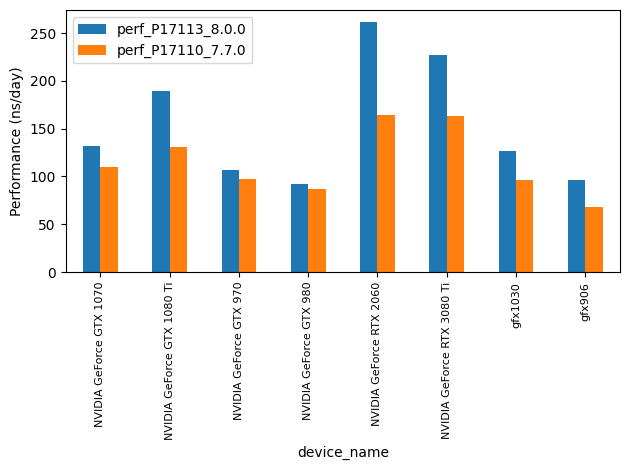

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 20))  # Adjust the values as needed
clean[["perf_P17113_8.0.0", "perf_P17110_7.7.0"]].plot.bar(ylabel="Performance (ns/day)")
plt.xticks(fontsize=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.savefig("openmm_c22_8.0.0_performance.png")

In [22]:
data_110_run_dev_grp = data_110.groupby(["run", "device_name"]).mean("perf_ns_per_day")


In [23]:
data_113_run_dev_grp = data_113.groupby(["run", "device_name"]).mean("perf_ns_per_day")
data_113_run_dev_grp

clone  gen  cuda_enabled  perf_ns_per_day
run device_name                                                               
0   Baffin                      143.000000  0.0           0.0        16.587200
    NVIDIA GeForce GTX 1070     181.090909  0.0           1.0       155.677636
    NVIDIA GeForce GTX 1080 Ti   63.253731  0.0           1.0       259.359791
    NVIDIA GeForce GTX 970       62.340000  0.0           1.0        98.237218
    NVIDIA GeForce GTX 980      167.000000  0.0           1.0        99.413200
...                                    ...  ...           ...              ...
16  NVIDIA GeForce GTX 970       57.923077  0.0           1.0       141.947692
    NVIDIA GeForce RTX 2060     144.000000  0.0           1.0       261.135000
    NVIDIA GeForce RTX 3060     163.086957  0.0           1.0       111.823261
    NVIDIA GeForce RTX 3080 Ti  131.083333  0.0           1.0       144.967583
    NVIDIA GeForce RTX 4070 Ti  135.000000  0.0           1.0       154.460462

[116 rows x 4 columns]

<Axes: xlabel='device_name'>

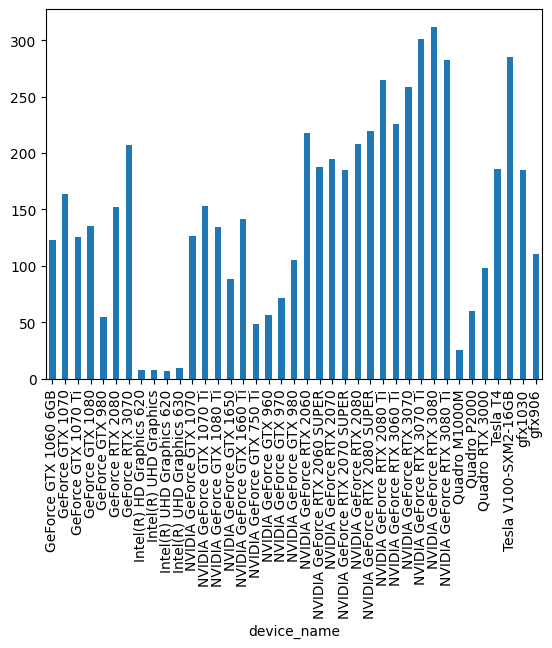

In [24]:
data_110_run_dev_grp["perf_ns_per_day"][0].plot.bar()


<Axes: xlabel='device_name'>

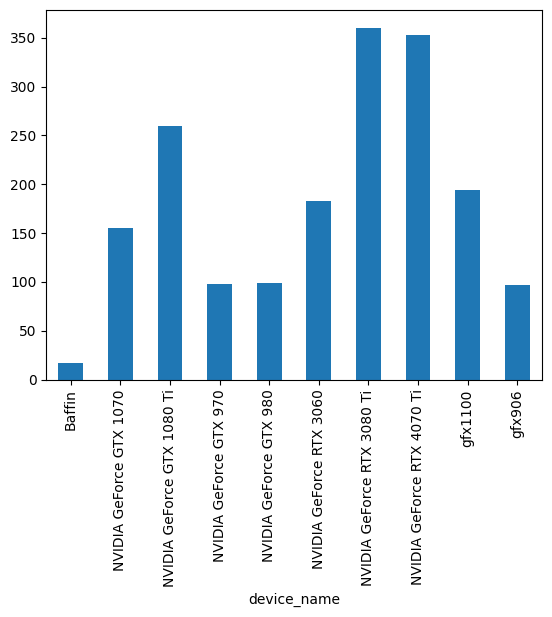

In [25]:
data_113_run_dev_grp["perf_ns_per_day"][0].plot.bar()


In [26]:
data_110["PROJ"] = 17110

In [27]:
data_113["PROJ"] = 17113

In [28]:
data_113_sel = data_113.reset_index().set_index("run")
data_110_sel = data_110.reset_index().set_index("run")

In [29]:
def plot_merged_run(df1, df2,run, name1, name2):
    
    d1_sub = df1[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name").mean("perf_ns_per_day")
    d1_sub["stdev_perf_ns_per_day"] = df1[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name")[["perf_ns_per_day"]].std()
    d2_sub = df2[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name").mean("perf_ns_per_day")
    d2_sub["stdev_perf_ns_per_day"] = df2[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name")[["perf_ns_per_day"]].std()
    col1 = "perf_ns_per_day" + "_" + name1
    col2 = "perf_ns_per_day" + "_" + name2
    col1_stdev = "stdev_perf_ns_per_day"  + "_" + name1
    col2_stdev = "stdev_perf_ns_per_day"  + "_" + name2
    merge = pd.merge(d1_sub,d2_sub, left_index=True, right_index=True, suffixes=(f'_{name1}', f'_{name2}'))
    merge.plot.bar(y=[col1, col2], title=f"Run {run}", yerr=merge[[col1_stdev, col2_stdev]].T.values)

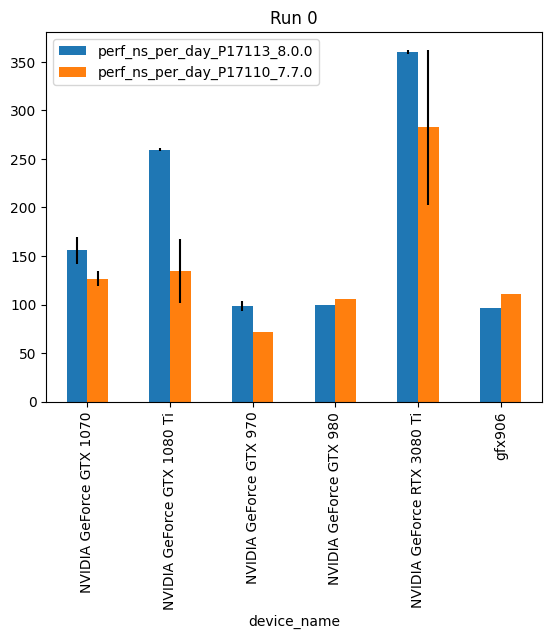

In [30]:
plot_merged_run(data_113_sel, data_110_sel, 0, "P17113_8.0.0","P17110_7.7.0")

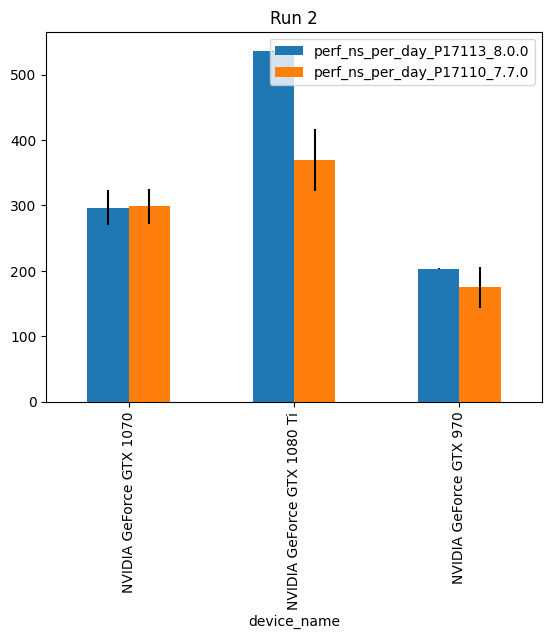

In [31]:
plot_merged_run(data_113_sel, data_110_sel, 2, "P17113_8.0.0","P17110_7.7.0")

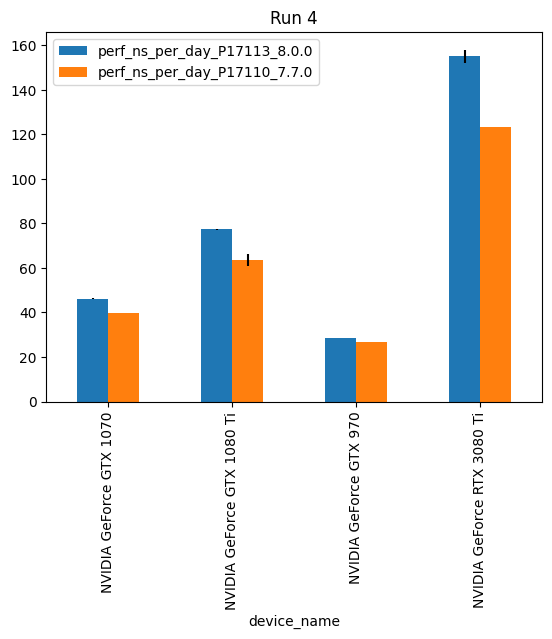

In [33]:
plot_merged_run(data_113_sel, data_110_sel, 4, "P17113_8.0.0","P17110_7.7.0")

In [34]:
import yaml
import glob
from pathlib import Path

def load_yaml_to_df(path, run):
    with open(path, 'r') as file:
        data = yaml.safe_load(file)
        gpu = data["system"]["gpu"]
        ns_day = data["benchmarks"][0]["ns_per_day"]
        df = pd.DataFrame({"run": run, "device_name": [gpu], "perf_ns_per_day_lilac": [ns_day]}).set_index("run")
        return df

def load_all_yamls(glob_path):
    files = glob.glob(glob_path)
    dfs = []
    for file in files:
        run_num = int(Path(file).stem.split("_")[0][-1])
        dfs.append(load_yaml_to_df(file, run_num))
    df = pd.concat(dfs)
    return df

In [35]:
load_yaml_to_df("./lilac_bench/run0_1080.yaml", 0)

,device_name,perf_ns_per_day_lilac
run,,
0,NVIDIA GeForce GTX 1080,252.907515


In [36]:
lilac_df = load_all_yamls("./lilac_bench/*")
lilac_df

,device_name,perf_ns_per_day_lilac
run,,
0,NVIDIA GeForce GTX 1080 Ti,326.247279
2,NVIDIA GeForce RTX 2080,505.446050
0,NVIDIA GeForce RTX 2080,429.235420
4,NVIDIA GeForce GTX 1080,51.691203
4,NVIDIA GeForce RTX 2080,96.758152
0,NVIDIA GeForce GTX 1080,252.907515
2,NVIDIA GeForce GTX 1080,386.134483
4,NVIDIA GeForce GTX 1080 Ti,75.144711
2,NVIDIA GeForce GTX 1080 Ti,509.610395


In [37]:
lilac_df_sub = lilac_df
lilac_df_sub

,device_name,perf_ns_per_day_lilac
run,,
0,NVIDIA GeForce GTX 1080 Ti,326.247279
2,NVIDIA GeForce RTX 2080,505.446050
0,NVIDIA GeForce RTX 2080,429.235420
4,NVIDIA GeForce GTX 1080,51.691203
4,NVIDIA GeForce RTX 2080,96.758152
0,NVIDIA GeForce GTX 1080,252.907515
2,NVIDIA GeForce GTX 1080,386.134483
4,NVIDIA GeForce GTX 1080 Ti,75.144711
2,NVIDIA GeForce GTX 1080 Ti,509.610395


In [38]:
def merge_with_lilac_ref(df1, df2, lilac_df, run, name1, name2, how="inner"):
    
    d1_sub = df1[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name").mean("perf_ns_per_day")
    d2_sub = df2[["perf_ns_per_day", "device_name"]].loc[run].groupby("device_name").mean("perf_ns_per_day")
    lilac_df_sub = lilac_df[["perf_ns_per_day_lilac", "device_name"]].loc[run].groupby("device_name").mean("perf_ns_per_day_lilac")
    merge = pd.merge(d1_sub,d2_sub, left_index=True, right_index=True, suffixes=(f'_{name1}', f'_{name2}'), how=how)
    merge = pd.merge(merge,lilac_df_sub, left_index=True, right_index=True, how="outer")
    return merge.sort_index()

In [39]:
plt.rc('axes', axisbelow=True)


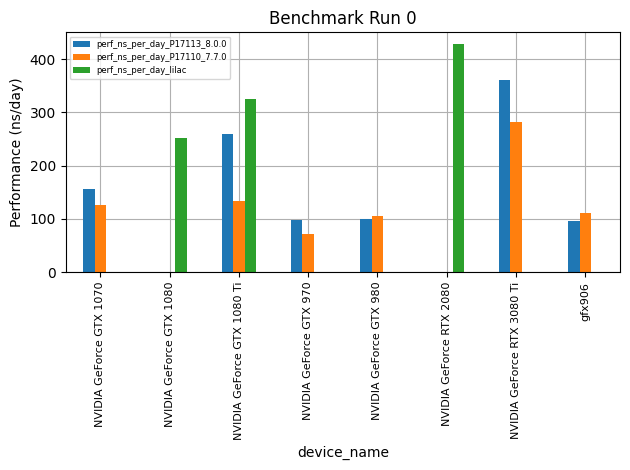

In [40]:
run0 = merge_with_lilac_ref(data_113_sel, data_110_sel, lilac_df, 0, "P17113_8.0.0","P17110_7.7.0")
run0.plot.bar( title="Benchmark Run 0",ylabel="Performance (ns/day)", grid=True)
plt.xticks(fontsize=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig("./plots/run0.png")

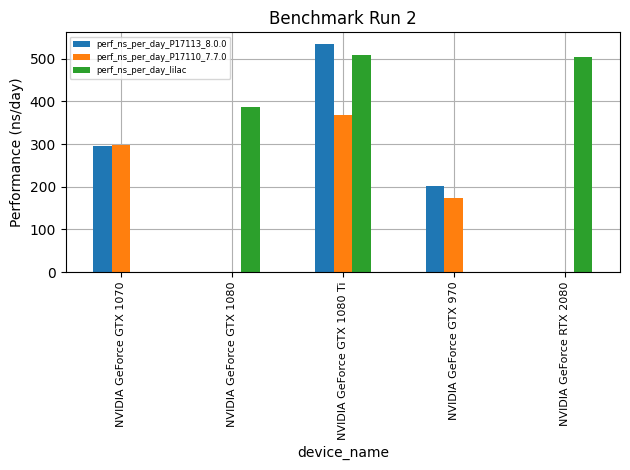

In [41]:
run2 = merge_with_lilac_ref(data_113_sel, data_110_sel, lilac_df, 2, "P17113_8.0.0","P17110_7.7.0")
run2.plot.bar(title="Benchmark Run 2", ylabel="Performance (ns/day)", grid=True)
plt.xticks(fontsize=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig("./plots/run2.png")

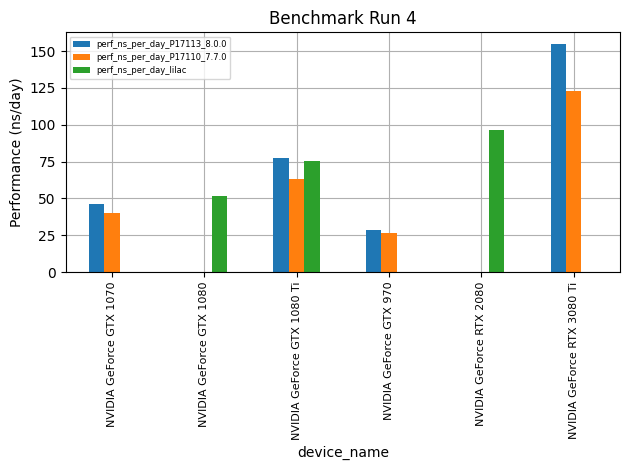

In [42]:
run4 = merge_with_lilac_ref(data_113_sel, data_110_sel, lilac_df, 4, "P17113_8.0.0","P17110_7.7.0")
run4.plot.bar(title="Benchmark Run 4", ylabel="Performance (ns/day)", grid=True)
plt.xticks(fontsize=8)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.legend(fontsize=6)
plt.tight_layout()
plt.savefig("./plots/run4.png")